In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
regressor = Sequential()

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(Dense(units = 1))

In [28]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
regressor.fit(X_train, y_train, epochs = 100,  batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 154ms/step - loss: 0.0331
Epoch 2/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 7s 176ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 6s 144ms/step - loss: 0.0040
Epoch 13/100

In [30]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [31]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs_scaled = sc.transform(inputs)

In [32]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [34]:
print(predicted_stock_price)

[[769.5845 ]
 [767.3714 ]
 [766.8062 ]
 [767.46313]
 [770.0164 ]
 [775.0295 ]
 [780.65405]
 [784.4666 ]
 [786.29675]
 [786.6793 ]
 [786.2466 ]
 [785.4094 ]
 [784.5483 ]
 [784.2888 ]
 [784.67053]
 [787.8634 ]
 [793.63727]
 [800.87787]
 [806.5025 ]
 [806.05646]]


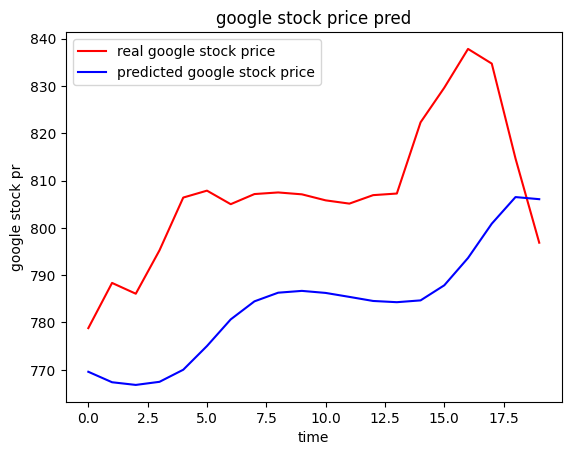

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'real google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted google stock price')
plt.title('google stock price pred')
plt.xlabel('time')
plt.ylabel('google stock pr')
plt.legend()
plt.show()

In [36]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [37]:
print(rmse)

26.69097162609789
